This model is made for the sntiment analysis

In [1]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import seaborn as sns

In [79]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kunalkapur/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kunalkapur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/kunalkapur/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kunalkapur/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
lemmatizer = WordNetLemmatizer()

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.columns = ['target','id','date','flag','user','text']

In [5]:
df.head()

,target,id,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [6]:
df = df.drop(columns =['id','date','flag','user'])

In [7]:
df['text_len'] = df['text'].apply(lambda x: len(x))

In [8]:
df.head(1)

,target,text,text_len
0,0,is upset that he can't update his Facebook by ...,111


<AxesSubplot:xlabel='text_len', ylabel='Count'>

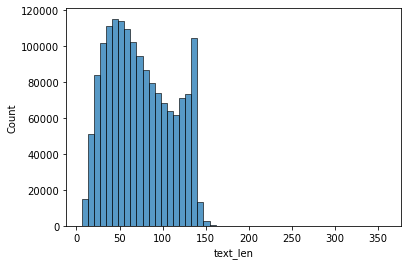

In [9]:
sns.histplot(df['text_len'],bins=50)

In [10]:
#DF is in some order so need to randomize it 
print(df['target'][0:800000].value_counts())
df = df.sample(frac=1)
print(df['target'][0:800000].value_counts())

0    799999
4         1
Name: target, dtype: int64
0    400365
4    399635
Name: target, dtype: int64


In [11]:
train_portion = int((2/3) * len(df))
df_test = df[train_portion:]
df = df[0:train_portion]

In [12]:
print(df_test.shape)
print(df.shape)

(533333, 3)
(1066666, 3)


In [13]:
tokenizer = RegexpTokenizer(r'\w+')

In [14]:
new_words =["get","go","quot","going, got"]

In [15]:
def remove_mention(text):
    text_split = text.split(" ")
    new_text = ""
    for i in text_split:
        #print(i)
        if "@" not in i:
            new_text += i + " "
    #print(new_text)
    return new_text[0:len(new_text)-1]

In [16]:
def tokenize(text):
    text = remove_mention(text)
    words = tokenizer.tokenize(text.lower())
    filtered = []
    for i in words:
        if not i in stopwords.words():
            filtered.append(i)
    for j in range(len(filtered)):
        filtered[j] = lemmatizer.lemmatize(filtered[j])
    return filtered

In [17]:
test_df = df[0:20]

In [18]:
test_df['tokenized_text'] = test_df['text'].apply(tokenize)

<ipython-input-18-944f8d003c27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['tokenized_text'] = test_df['text'].apply(tokenize)


In [19]:
pd.set_option('display.max_colwidth', None)

In [20]:
#Testing dummy df
test_df.head(10)

,target,text,text_len,tokenized_text
771475,0,@Destini41 I want one!! I want one! have one for me i'm at work,65,[work]
293717,0,@DjJimmyJams WTF? At 6? That shits already on on my t.v,56,"[wtf, 6, shit, already]"
919338,4,@simonusher a bit too early for me and wanting to have nice lunch too... have a good time,90,"[bit, early, wanting, nice, lunch, good, time]"
1046926,4,Its a bit cloudy yet but the weatherman promised sunshine. No place nicer than Scotland when the sun shines,108,"[bit, cloudy, yet, weatherman, promised, sunshine, place, nicer, scotland, sun, shine]"
1081043,4,but i am one happy girl right now.,37,"[happy, girl, right]"
701615,0,errands galore.... and hopefully the beach? if i finish all my stuff.. its 81 and humid finally chicago summer? right as i leave,129,"[errand, galore, hopefully, beach, finish, stuff, 81, humid, finally, chicago, summer, right, leave]"
1585188,4,@iamyas yes yes .. its meee hehe.,34,"[yes, yes, meee, hehe]"
980683,4,loves how everyone is up as late as me studying for finals i feel like a true college student,95,"[love, everyone, late, studying, final, feel, like, true, college, student]"
369705,0,@urbanettex2 oh I'm at work wish I could join you! xx,54,"[oh, work, wish, could, join, xx]"
11174,0,Is fed up being on her own..............must be more to life than this shite,78,"[fed, must, life, shite]"


In [21]:
pd.set_option('display.max_colwidth', 80)
word_dict = {}

In [24]:
partitioned_df = df[0:90000]

In [25]:
partitioned_df['tokenized_text'] = partitioned_df['text'].apply(tokenize)

<ipython-input-25-67e67d3eae31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partitioned_df['tokenized_text'] = partitioned_df['text'].apply(tokenize)


In [27]:
partitioned_df.head()

,target,text,text_len,tokenized_text
771475,0,@Destini41 I want one!! I want one! have one for me i'm at work,65,[work]
293717,0,@DjJimmyJams WTF? At 6? That shits already on on my t.v,56,"[wtf, 6, shit, already]"
919338,4,@simonusher a bit too early for me and wanting to have nice lunch too... hav...,90,"[bit, early, wanting, nice, lunch, good, time]"
1046926,4,Its a bit cloudy yet but the weatherman promised sunshine. No place nicer th...,108,"[bit, cloudy, yet, weatherman, promised, sunshine, place, nicer, scotland, s..."
1081043,4,but i am one happy girl right now.,37,"[happy, girl, right]"


In [26]:
partitioned_df.to_parquet('partitioned_data.parquet')

In [103]:
partitioned_df[0:60000].to_parquet('training_data.parquet')

In [105]:
partitioned_df[60000:90000].to_parquet('test_data.parquet')